In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans

# Question 1

In [2]:
# Import the dataset
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
# Drop the date column
df = df.drop(columns=['date'])

In [4]:
# Print out all the unique elements for each of the categorical attributes
categorical_attributes = ['day', 'quarter', 'department', 'team']

for attribute in categorical_attributes:
    print(f'Unique elements for {attribute}:', df[attribute].unique())

Unique elements for day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Unique elements for quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Unique elements for department: ['sweing' 'finishing ' 'finishing']
Unique elements for team: [ 8  1 11 12  6  7  2  3  9 10  5  4]


**There are no duplicated items.**

In [5]:
# Create another column named `satisfied` that records the productivity performance.
df['satisfied'] = df['actual_productivity'] >= df['targeted_productivity']

In [6]:
# Drop the columns `actual_productivity` and `targeted_productivity`.
df = df.drop(columns=['actual_productivity', 'targeted_productivity'])

In [7]:
# Fill empty values with 0
df = df.fillna(0)

# Question 2

In [8]:
# Encode categories for each categorical attribute
df_2 = df.copy()
for attribute in categorical_attributes:
    le = LabelEncoder()
    df_2[attribute] = le.fit_transform(df_2[attribute])

In [9]:
# Split the data into training and testing set with the ratio of 80:20
X = df_2.drop(columns=['satisfied'])
y = df_2['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build a Categorical Naïve Bayes classifier
classifier = CategoricalNB()
classifier.fit(X_train[categorical_attributes], y_train)
y_pred = classifier.predict(X_test[categorical_attributes])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.48      0.19      0.27        63
        True       0.76      0.93      0.84       177

    accuracy                           0.73       240
   macro avg       0.62      0.56      0.55       240
weighted avg       0.69      0.73      0.69       240



# Question 3

In [11]:
# For each of the **categorical attribtues**, encode them with **one-hot encoding**
df3 = df.copy()
df3 = pd.get_dummies(df3, columns=categorical_attributes)

In [12]:
# Define features (X) and target variable (y)
X = df3.drop(columns=['satisfied'])
y = df3['satisfied']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing set with the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Build SVM with linear kernel
# ?? Takes around 2-3 min
svm_linear = SVC(kernel='linear') # SVM not SVC??
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

classification_report(y_test, y_pred_linear)

'              precision    recall  f1-score   support\n\n       False       0.75      0.19      0.30        63\n        True       0.77      0.98      0.86       177\n\n    accuracy                           0.77       240\n   macro avg       0.76      0.58      0.58       240\nweighted avg       0.77      0.77      0.72       240\n'

In [14]:
# Build SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        63
        True       0.74      1.00      0.85       177

    accuracy                           0.74       240
   macro avg       0.37      0.50      0.42       240
weighted avg       0.54      0.74      0.63       240



/home/random/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/random/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/random/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [15]:
# For the column `satisfied` in our **training set**, please **print out** the frequency of each class. 
print(y_train.value_counts())

satisfied
True     698
False    259
Name: count, dtype: int64


In [ ]:
# 3.3 ??

# Exercise 4

In [16]:
# Cluster the dataset with k-means, but with the number 60
X = df3.drop(columns=['satisfied'])

k = 60
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Calculate and report the Akaike Information Criterion
n_samples, n_features = X.shape
aic = kmeans.inertia_ + 2 * n_features
aic # ?? is this correct?

33114866.358070366

In [20]:
# Show the frequency (number of members) of each cluster
cluster_freq = np.bincount(cluster_labels)
cluster_freq

array([ 31,  50,   3,  34, 161,   1,  15,   4,   3,   2,  50,   9,  11,
        33,   8,  16,   1,   8,  12,   9, 117,   5,   1,  19,   2,   8,
        44,  12,   2,  28,   9,  24,  36,  29,  40,   1,  20,   4,  15,
        12,  11,  42,  18,   7,  16,  19,  25,   1,  10,   1,  36,   5,
        22,   1,  12,   6,   6,  27,  11,  32])

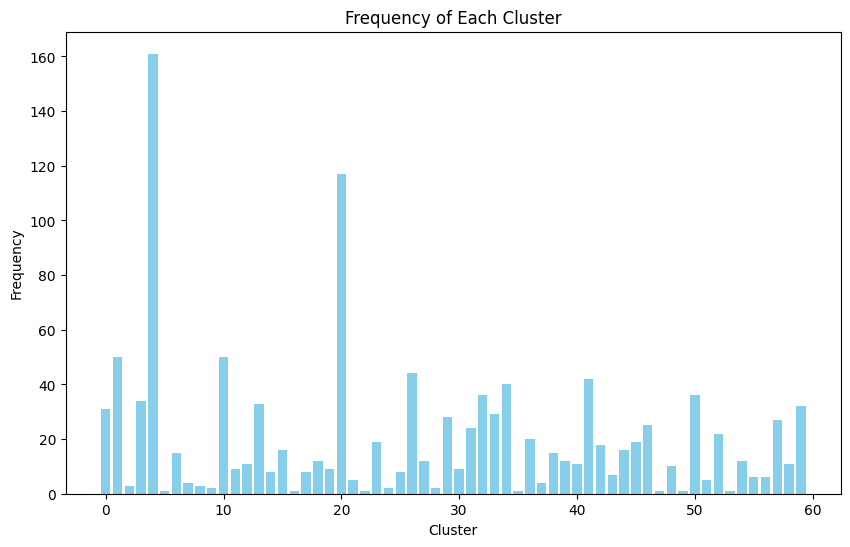

In [23]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(k), cluster_freq, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')
plt.show()

In [ ]:
# 4.2 ??